<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210726.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 애플리케이션

In [ ]:
# profileapp 생성, 터미널창에
python manage.py startapp profileapp

# settings.py
INSTALLED_APPS = [
    '...',
    'bootstrap4',
    'accountapp',
    'profileapp',     # profileapp을 추가해준다.
]

# gsweb\urls.py
urlpatterns = [
    path('admin/', admin.site.urls),
    path('accounts/',include('accountapp.urls')),
    path('profiles/', include('profileapp.urls'))   # profileapp.urls 추가
]

# profileapp에 urls.py를 생성해준다.
# 기본적으로 앱을 만들 때 urls.py는 생성되지 않는다.
urlpatterns = [

]


* on_delete는 일대일로 연결해놓았던 유저가 삭제된다면 어떻게 할것인가라는 뜻                                                            
* models.CASCADE는 삭제(종속)한다는 의미 -> 유저객체가 사라진다면 profile도 삭제
* models.SET_NULL는 user가 삭제된다면 NULL로 유저를 변경한다는 뜻
* related_name은 어떤 이름으로 불러올건지
* upload_to 경로관련, null= 비어있어도 괜찮은지 True, False

In [ ]:
# gsweb\profileapp\models.py
class Profile(models.Model):
    user = models.OneToOneField(User, on_delete=models.CASCADE,
                                related_name='profile')
    image = models.ImageField(upload_to='profile/', null=True)
    nickname = models.CharField(max_length=30, unique=True, null=True)
    message = models.CharField(max_length=200, null=True)



python manage.py makemigrations
# Migrations for 'profileapp':
#  profileapp\migrations\0001_initial.py
#   - Create model Profile

python manage.py migrate
# Operations to perform:
#   Apply all migrations: accountapp, admin, auth, contenttypes, profileapp, sessions
# Running migrations:
#   Applying profileapp.0001_initial... OK


#### migration command
* makimigrations
  - model변경을 감지하고 변경사항을 반영할 파일 생성
* migrate
* django에서 database schema에 데이터베이스 생성, 변경?


In [ ]:
# gsweb\profileapp\forms.py
class ProfileCreationForm(ModelForm):
    class Meta:
        model = Profile
        fields = ['image', 'nickname', 'message']   # user이 없는 이유는 user은 서버에서 직접 처리


# gsweb\profileapp\views.py
class ProfileCreateView(CreateView):
    model = Profile
    form_class = ProfileCreationForm
    success_url = reverse_lazy('accountapp:hello_world')
    template_name = 'profileapp/create.html'


In [ ]:
# profileapp에 templates디렉토리를 만들고 그 안에 profileapp 디렉토리를 만든 후  create.html을 생성해준다.
# gsweb\profileapp\templates\profileapp\create.html
{% extends 'base.html' %}
{% load bootstrap4 %}


{% block content %}

    <div class="text-center mw-500 m-auto">
        <div>
            <h4 class="m-5"> Create Profile </h4>
        </div>
        <div>
            <form action="{% url 'profileapp:create' %}" 
                  enctype="multipart/form-data" method="post">        # enctype
                {% csrf_token %}
                {% bootstrap_form form %}
                <div class="m-5">
                    <input type="submit" class="btn btn-dark rounded-pill px-5">
                </div>
            </form>
        </div>
    </div>

{% endblock %}

- form tag의 enctype 속성 : <form> 태그의 enctype 속성은 폼 데이터(form data)가 서버로 제출될 때 해당 데이터가 인코딩되는 방법을 명시합니다. 
  이 속성은 <form> 요소의 method 속성값이 “post”인 경우에만 사용할 수 있습니다.
  
| 속성값 | 설명 |
| --- | --- |
|application/x-www-form-urlencoded|기본값으로, 모든 문자들은 서버로 보내기 전에 인코딩됨을 명시함.|
|multipart/form-data| 모든 문자를 인코딩하지 않음을 명시함. 이 방식은 <form> 요소가 파일이나 이미지를 서버로 전송할 때 주로 사용함.|
|text/plain|공백 문자(space)는 "+" 기호로 변환하지만, 나머지 문자는 모두 인코딩되지 않음을 명시함.|


# 2. 알고리즘

# 3. 딥러닝

# 4. 머신러닝

#### LogisticRegression 실습 02

forge 데이터 셋을 이용

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=1aab6ad643ce75d0fb37df292cc94f294c4de83d48767cf8343270daf65085dd
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [ ]:
X, y = make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


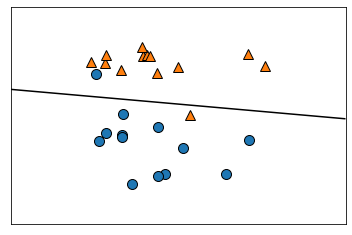

In [ ]:
# C 값을 변경해가면서 결정경계가 어떻게 변하는지 확인해보자.
model = LogisticRegression(C=0.1, max_iter=100).fit(X, y)

mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

#### LogisticRegression 실습 03
유방암 데이터를 이용한 분석 - 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.data.shape
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(426, 30)

In [ ]:
model = LogisticRegression(C=1, max_iter=10000).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.960093896713615, 0.951048951048951)

In [ ]:
# (실습) C=100, C=0.01 등으로 변경하면서 학습 점수의 결과를 비교
model_100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
model_100.score(X_train, y_train), model_100.score(X_test, y_test)

(0.9812206572769953, 0.958041958041958)

In [ ]:
# (실습) C=100, C=0.01 등으로 변경하면서 학습 점수의 결과를 비교
model_01 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
model_01.score(X_train, y_train), model_01.score(X_test, y_test)

(0.9530516431924883, 0.9440559440559441)

규제 매개변수 C 설정을 다르게 하여 학습 시킨 모델의 계수 표시

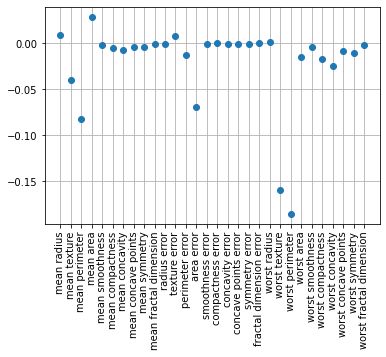

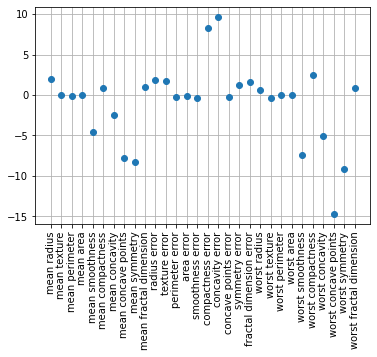

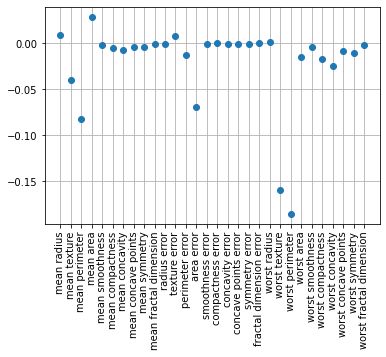

In [ ]:
# 다른 C 값의 결과 추가
plt.plot(model.coef_.T, 'o')  #.T : 전치행렬
plt.xticks(range(30), cancer.feature_names, rotation=90)
plt.grid()
plt.show()

# 실습 - C 값에 따른 가중치 변화 시각화
plt.plot(model_100.coef_.T, 'o')

plt.xticks(range(30), cancer.feature_names, rotation=90)
plt.grid()
plt.show()

# 실습 - C 값에 따른 가중치 변화 시각화
plt.plot(model_01.coef_.T, 'o')

plt.xticks(range(30), cancer.feature_names, rotation=90)
plt.grid()
plt.show()

(실습) C=100, C=0.01 등으로 변경하면서 학습시킨 학습모델의 계수를 위의 그래프에 표시

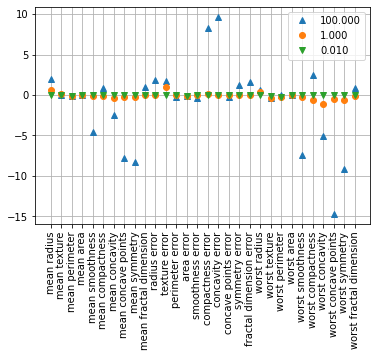

In [ ]:
# 실습 - C 값에 따른 가중치 변화 시각화
for C, marker in zip( [100, 1, 0.01], ['^', 'o', 'v'] ):
  model = LogisticRegression(C=C, max_iter=10000).fit(X_train, y_train)
  model.score(X_train, y_train), model.score(X_test, y_test)
  plt.plot(model.coef_.T, marker, label=f'{C:.3f}')

plt.xticks(range(30), cancer.feature_names, rotation=90)
plt.grid()
plt.legend()
plt.show()

C를 L1규제로 사용할 경우 분류 정확도와 계수 그래프를 표시

- Regularization에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 주요 parameter는 'penalty'

In [ ]:
model_l1 = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=10000)
model_l1.fit(X_train, y_train)
# C를 올리면 특성 수가 늘어난다.
print('사용한 특성 수:', np.sum(model_l1.coef_ != 0 ) )
model_l1.score(X_train, y_train), model_l1.score(X_test, y_test)

사용한 특성 수: 11


(0.9624413145539906, 0.958041958041958)

In [ ]:
# C 값에 따른 가중치 변화 시각화

#### LogisticRegression 실습 04

와인 데이터를 이용한 분류

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

wine = load_wine()
wine.keys()
wine.data.shape
wine.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['등급'] = wine.target
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,등급
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [ ]:
# 학습 데이터와 테스트 데이터 준비
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(133, 13)

In [ ]:
# 모델 선택 및 학습 그리고 평가
model = LogisticRegression(C=0.1, max_iter=10000)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9774436090225563, 0.9555555555555556)

In [ ]:
y_pred = model.predict(X_test)
print(y_test.values)
print(y_pred)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]
[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 1 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


#### LogisticRegression 실습 05

wave 데이터를 이용한 다중 분류

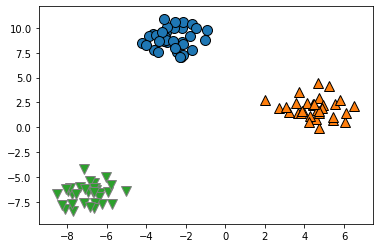

In [ ]:
# 데이터 생성 및 시각화
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [ ]:
# 훈련셋 및 테스트셋 분리 및 LogisticRegression 실행
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LogisticRegression(C=1, max_iter=10000)
model.fit(X_train, y_train)

#평가하기
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 1.0)

In [ ]:
# 예측하기
y_pred = model.predict(X_test)
print(y_test)
print(y_pred)

[1 0 0 2 2 1 2 0 2 0 2 0 1 0 1 2 2 0 2 1 0 2 1 2 1]
[1 0 0 2 2 1 2 0 2 0 2 0 1 0 1 2 2 0 2 1 0 2 1 2 1]


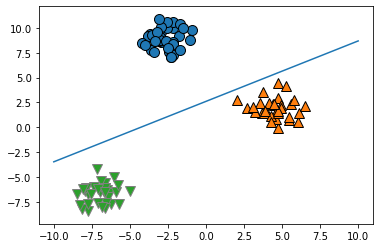

In [ ]:
# 실행 결과 시각화
xx = np.linspace(-10, 10, 50)
yy = -(model.coef_[0][0] * xx + model.intercept_[0]) / model.coef_[0][1]
plt.plot(xx, yy)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

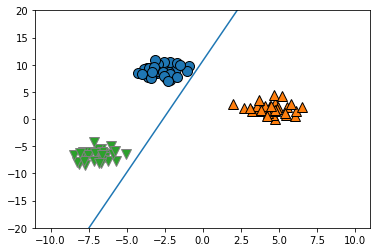

In [ ]:
# 실행 결과 시각화
xx = np.linspace(-10, 10, 50)
yy = -(model.coef_[1][0] * xx + model.intercept_[1]) / model.coef_[1][1]
plt.plot(xx, yy)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.ylim(-20,20)
plt.show()

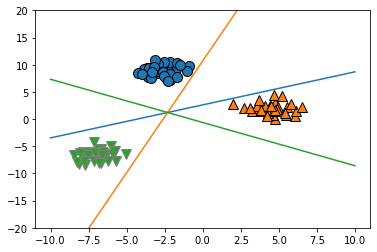

In [ ]:
# 실행 결과 시각화
xx = np.linspace(-10, 10, 50)
for w, b in zip( model.coef_, model.intercept_ ):
  yy = -(w[0] * xx + b) / w[1]
  plt.plot(xx, yy)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.ylim(-20, 20)
plt.show()